In [3]:

import warnings
warnings.filterwarnings("ignore")
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/unsupervised')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_iris
iris_raw_data=load_iris()
X=pd.DataFrame(iris_raw_data.data)
X.columns=iris_raw_data.feature_names

print(" ",type(iris_raw_data)," ==> ", type(X))

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_scaled=std.fit_transform(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_scaled_pca=pca.fit_transform(X_scaled)

  <class 'sklearn.utils._bunch.Bunch'>  ==>  <class 'pandas.core.frame.DataFrame'>


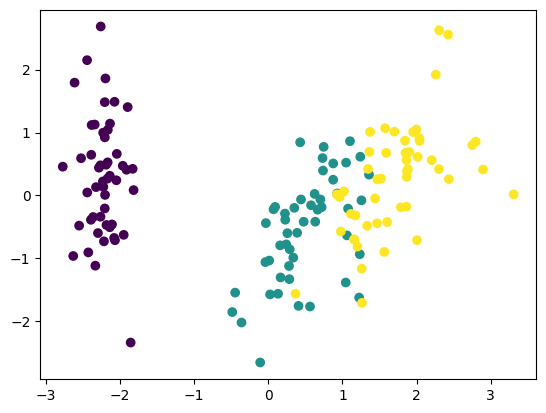

In [15]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=iris_raw_data.target)

Text(0, 0.5, 'Eucledian Distance')

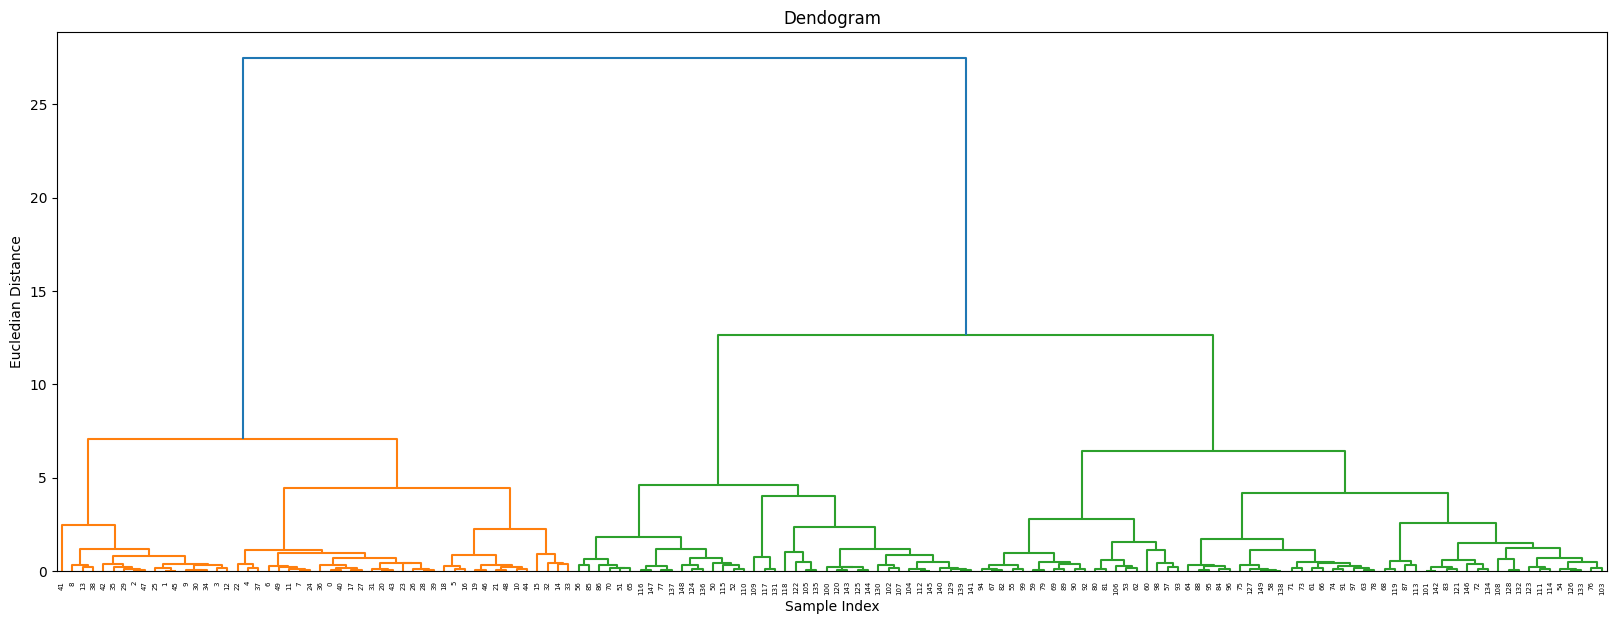

In [17]:
import scipy.cluster.hierarchy as sc
##plot the dendrogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendrogram
sc.dendrogram(sc.linkage(X_scaled_pca,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(X_scaled_pca)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

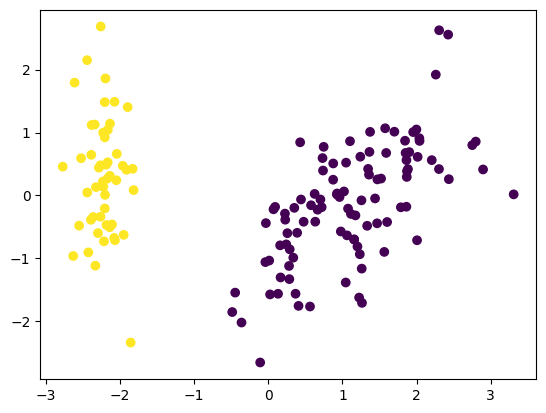

In [21]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=cluster.labels_)

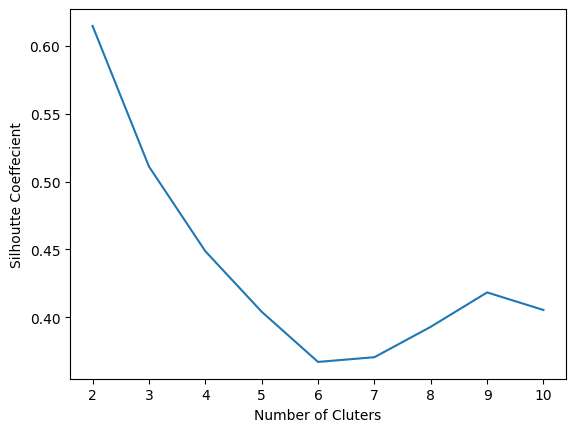

In [24]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled_pca)
    score = silhouette_score(X_scaled_pca, agglo.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()
    


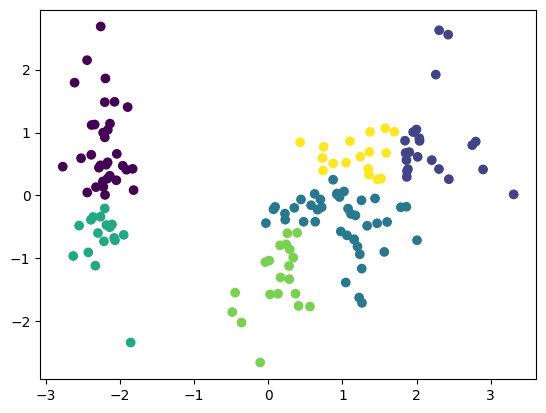

In [26]:
from sklearn.cluster import AgglomerativeClustering
optimized_cluster=AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward')
optimized_cluster.fit(X_scaled_pca)
optimized_cluster.labels_

plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=optimized_cluster.labels_)